In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

In [7]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {df.shape}")
print(df.head())

Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
# 1. DATA CLEANING
print("\n1. DATA CLEANING")
# Replace zeros with NaN in columns where zero is physiologically impossible
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_clean:
    df[column] = df[column].replace(0, np.nan)


1. DATA CLEANING


In [10]:
# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df[columns_to_clean] = imputer.fit_transform(df[columns_to_clean])

In [11]:
# 2. DATA INTEGRATION
print("\n2. DATA INTEGRATION")
# Create HOMA-IR (insulin resistance measure)
df['HOMA_IR'] = (df['Glucose'] * df['Insulin']) / 405



2. DATA INTEGRATION


In [12]:
# 3. DATA TRANSFORMATION
print("\n3. DATA TRANSFORMATION")
# Log transform skewed features
df['Insulin_Log'] = np.log1p(df['Insulin'])
df['HOMA_IR_Log'] = np.log1p(df['HOMA_IR'])


3. DATA TRANSFORMATION


In [13]:
# 4. DATA REDUCTION
print("\n4. DATA REDUCTION")
# Prepare features and target
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_Log', 
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'HOMA_IR_Log']]
y = df['Outcome']



4. DATA REDUCTION


In [14]:
# Feature selection
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

Selected features: Index(['Glucose', 'Insulin_Log', 'BMI', 'Age', 'HOMA_IR_Log'], dtype='object')


In [15]:
# PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.2f}")


PCA explained variance: 0.92


In [16]:
# 5. FEATURE SCALING
print("\n5. FEATURE SCALING")
# Normalization
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)



5. FEATURE SCALING


In [17]:
# Standardization
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)


In [18]:
# 6. TRAIN-TEST SPLIT
print("\n6. TRAIN-TEST SPLIT")
X_train, X_test, y_train, y_test = train_test_split(
    X_standardized, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


6. TRAIN-TEST SPLIT
Training set: (614, 9), Test set: (154, 9)


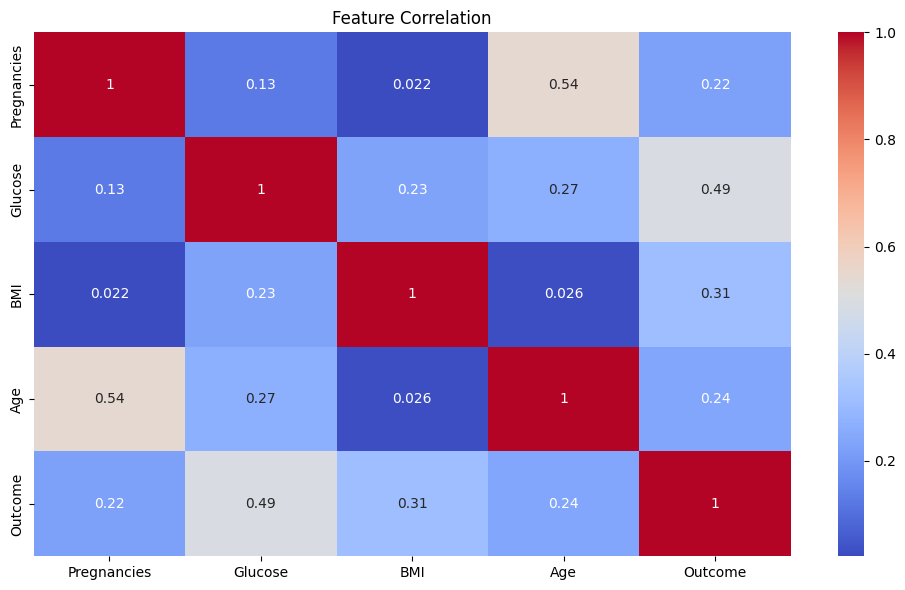

In [19]:
# Quick visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')